Ultralytics YOLOv8.0.26  Python-3.10.11 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3080 Ti Laptop GPU, 16384MiB)
YOLOv8l summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs

image 1/1 C:\Users\johnm\OneDrive\2026\cvzone\Images\1.png: 384x640 8 persons, 1 bus, 4 backpacks, 3 handbags, 1 skateboard, 15.4ms
Speed: 1.0ms pre-process, 15.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


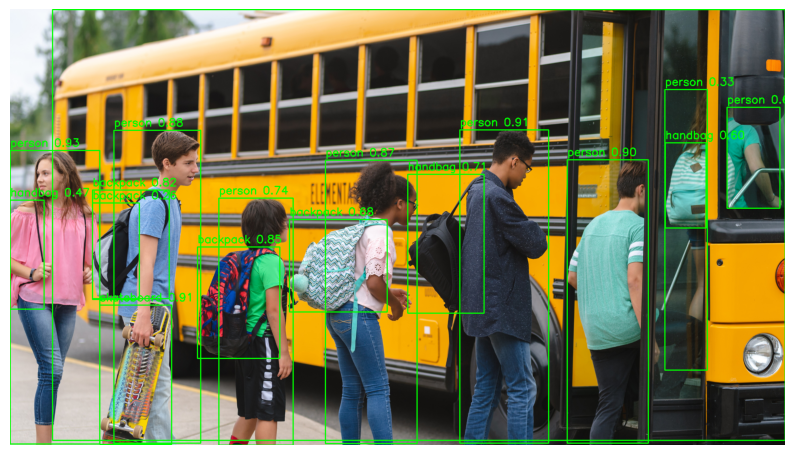

Detected: bus | Confidence: 0.96 | Box Coordinates: (105.0, 1.0), (1920.0, 1068.0)
Detected: person | Confidence: 0.93 | Box Coordinates: (0.0, 350.0), (222.0, 1077.0)
Detected: skateboard | Confidence: 0.91 | Box Coordinates: (222.0, 733.0), (400.0, 1078.0)
Detected: person | Confidence: 0.91 | Box Coordinates: (1114.0, 299.0), (1334.0, 1075.0)
Detected: person | Confidence: 0.90 | Box Coordinates: (1380.0, 373.0), (1581.0, 1075.0)
Detected: person | Confidence: 0.88 | Box Coordinates: (257.0, 300.0), (472.0, 1075.0)
Detected: person | Confidence: 0.87 | Box Coordinates: (781.0, 374.0), (1008.0, 1076.0)
Detected: backpack | Confidence: 0.85 | Box Coordinates: (464.0, 589.0), (668.0, 865.0)
Detected: backpack | Confidence: 0.82 | Box Coordinates: (204.0, 448.0), (394.0, 717.0)
Detected: person | Confidence: 0.74 | Box Coordinates: (517.0, 468.0), (701.0, 1080.0)
Detected: handbag | Confidence: 0.71 | Box Coordinates: (985.0, 409.0), (1174.0, 753.0)
Detected: backpack | Confidence: 0.68

In [17]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the model
model = YOLO("./Yolo-Weights/yolov8l.pt")

# Run inference on the image
results = model("../Images/1.png")

# Access the first result (assuming it's a single image)
result = results[0]

# Read the original image to overlay the bounding boxes
img = cv2.imread("../Images/1.png")

# Loop over the detected boxes and draw them on the image
for box in result.boxes:
    # Extract the coordinates (xyxy format)
    x1, y1, x2, y2 = box.xyxy[0]

    # Convert to integers
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

    # Draw the bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Get the confidence score and class label
    conf = box.conf[0]
    class_id = int(box.cls[0])
    label = model.names[class_id]

    # Put the label and confidence on the image
    label_text = f"{label} {conf:.2f}"
    cv2.putText(img, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Convert BGR to RGB for correct display in matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes in Jupyter notebook
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes for cleaner display
plt.show()

# Print detection results
for box in result.boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    conf = box.conf[0]
    class_id = int(box.cls[0])
    label = model.names[class_id]
    print(f"Detected: {label} | Confidence: {conf:.2f} | Box Coordinates: ({x1}, {y1}), ({x2}, {y2})")



